In [1]:
import numpy as np
import ROOT
import matplotlib.pyplot as plt
import os, re
import pandas as pd
import matplotlib.cm as cm

Welcome to JupyROOT 6.18/04


In [2]:
from ROOT import TH1F, TCanvas, TF1, gStyle

In [3]:
regex = re.compile(r'\d+')

In [4]:
data_folder=os.path.join('/','Users', 'cdesio','UoB','leakage')

In [32]:
data_200f = os.path.join(data_folder, 'test','T-10.0', 'Tint1753440')

In [6]:
fnames = os.listdir(data_200f)

In [7]:
file1 = os.path.join(data_200f, fnames[0])

In [8]:
rad_dam = [50, 45, 40, 35, 30, 20, 18, 16, 14, 12, 10, 
           9, 8, 25, 6, 5, 4, 3, 2, 1]

In [9]:
a0=580
a1=440
a_shift = 402

a = [a0+alpha*a1+beta*a_shift for alpha, beta in zip([0,1,1,1],[0,0,1,2])]

b0=360
b1=420
b_shift = 402

b = [b0+alpha*b1+beta*b_shift for alpha, beta in zip([0,1,1,1,1],[0,0,1,2,3])]

---

In [7]:
im = plt.imread(file1)

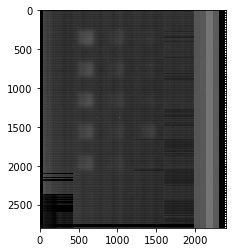

In [8]:
plt.imshow(im, cmap='gray')

In [30]:
def rad_dam_tint(folder):
    int_times = []
    fnames_list = os.listdir(folder)
    for fname in fnames_list:
        if fname.endswith('tiff'):
            tint = regex.findall(fname)[0]
            int_times.append(int(tint))
    sorted_fnames_list = np.array(fnames_list)[np.argsort(int_times)]
    a0=580
    a1=440
    a_shift = 400
    a = [a0+alpha*a1+beta*a_shift for alpha, beta in zip([0,1,1,1],[0,0,1,2])]
    b0=360
    b1=420
    b_shift = 400
    b = [b0+alpha*b1+beta*b_shift for alpha, beta in zip([0,1,1,1,1],[0,0,1,2,3])]
    count_points = []
    
    for f, t in zip(sorted_fnames_list, np.sort(int_times)):
        im = plt.imread(os.path.join(folder, f))
        print(f)
        iter_rad_dam = iter(rad_dam)
        for xa in a:
            for yb in b:
                point = (xa, yb)
                count_points.append((next(iter_rad_dam), point, im[yb, xa], t))
    df = pd.DataFrame(count_points, columns=['pt_n','point','count', 'tint'])
    return df

In [44]:
def plot_alltogether(df, rad_dam_list):
    colors=iter(cm.jet(np.linspace(0, 1,len(rad_dam_list))))
    plt.figure(figsize=(15,10))
    iter_rad_dam = iter(np.sort(rad_dam_list))
    for point in iter_rad_dam:
        plt.plot(np.array(df[df['pt_n']==point]['tint']), np.array(df[df['pt_n']==point]['count']), '-o',
                label='rad_dam {} kGy'.format(point), color=next(colors))
        plt.xlabel('integration time', fontsize=14)
        plt.ylabel('pedistal', fontsize=14)
        plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.5))

In [33]:
df = rad_dam_tint(data_200f)

File_0.tiff
File_1.tiff
File_2.tiff
File_3.tiff
File_4.tiff
File_5.tiff
File_6.tiff
File_7.tiff
File_8.tiff
File_9.tiff
File_10.tiff
File_11.tiff
File_12.tiff
File_13.tiff
File_14.tiff
File_15.tiff
File_16.tiff
File_17.tiff
File_18.tiff
File_19.tiff
File_20.tiff
File_21.tiff
File_22.tiff
File_23.tiff
File_24.tiff
File_25.tiff
File_26.tiff
File_27.tiff
File_28.tiff
File_29.tiff
File_30.tiff
File_31.tiff
File_32.tiff
File_33.tiff
File_34.tiff
File_35.tiff
File_36.tiff
File_37.tiff
File_38.tiff
File_39.tiff
File_40.tiff
File_41.tiff
File_42.tiff
File_43.tiff
File_44.tiff
File_45.tiff
File_46.tiff
File_47.tiff
File_48.tiff
File_49.tiff
File_50.tiff
File_51.tiff
File_52.tiff
File_53.tiff
File_54.tiff
File_55.tiff
File_56.tiff
File_57.tiff
File_58.tiff
File_59.tiff
File_60.tiff
File_61.tiff
File_62.tiff
File_63.tiff
File_64.tiff
File_65.tiff
File_66.tiff
File_67.tiff
File_68.tiff
File_69.tiff
File_70.tiff
File_71.tiff
File_72.tiff
File_73.tiff
File_74.tiff
File_75.tiff
File_76.tiff
File_77.t

In [34]:
df

,pt_n,point,count,tint
0,50,"(580, 360)",5081,0
1,45,"(580, 780)",4829,0
2,40,"(580, 1180)",4732,0
3,35,"(580, 1580)",4732,0
4,30,"(580, 1980)",4597,0
...,...,...,...,...
3995,5,"(1820, 360)",4121,199
3996,4,"(1820, 780)",3890,199
3997,3,"(1820, 1180)",2753,199
3998,2,"(1820, 1580)",2799,199


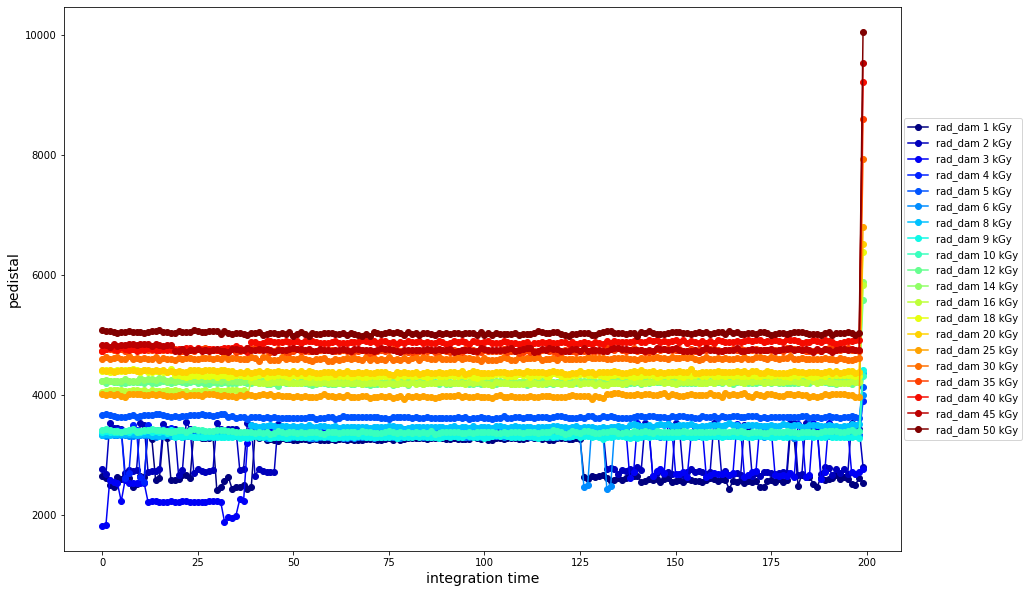

In [46]:
plot_alltogether(df, rad_dam)

580 360 50 5025
580 780 45 4713
580 1182 40 4827
580 1584 35 4617
580 1986 30 4679
1020 360 20 4371
1020 780 18 4316
1020 1182 16 4277
1020 1584 14 4258
1020 1986 12 4155
1422 360 10 3606
1422 780 9 3554
1422 1182 8 3534
1422 1584 25 4269
1422 1986 6 3533
1824 360 5 3616
1824 780 4 3425
1824 1182 3 3425
1824 1584 2 3316
1824 1986 1 3274


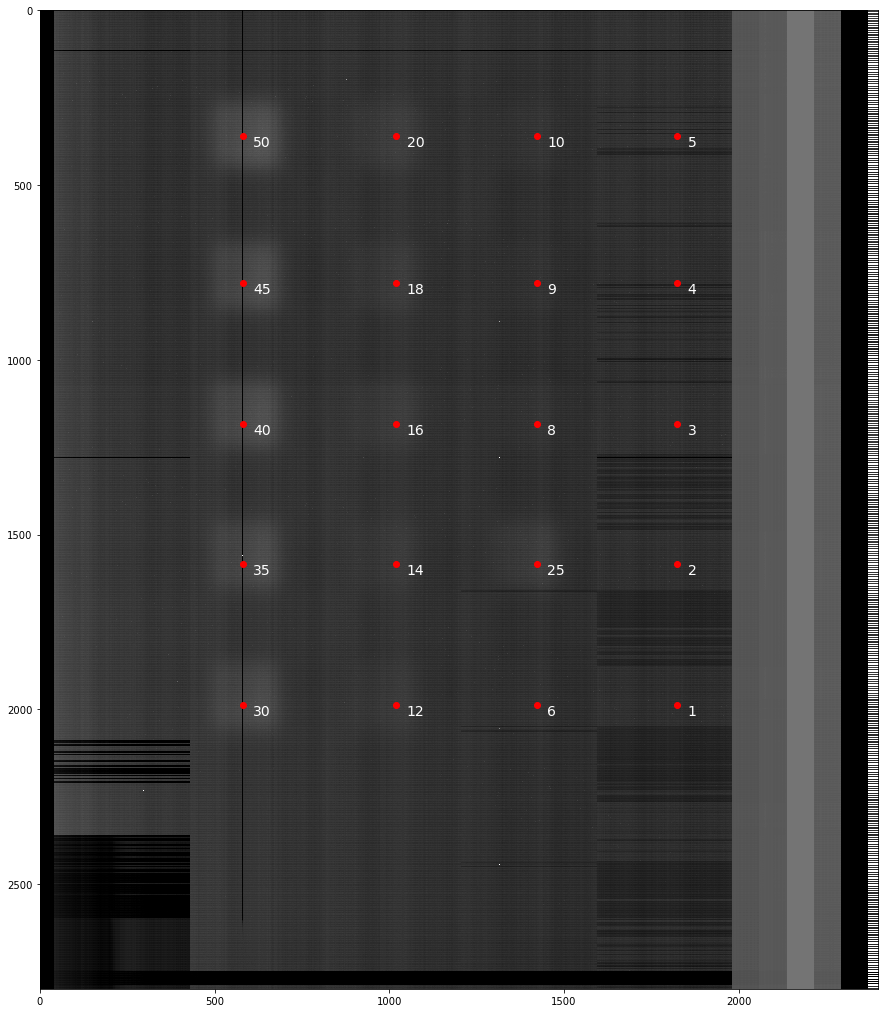

In [23]:
plt.figure(figsize=(20,18))
plt.imshow(im, cmap='gray')
#plt.xlim(0,2400)
#plt.ylim(0, 2800)
iter_rad_dam = iter(rad_dam)
for xa in a:
    for xb in b:
        label=next(iter_rad_dam)
        plt.scatter(xa, xb, c='red')
        plt.text(xa+30, xb+30,label , color='w', size=14)
        print(xa, xb, label, im[xb, xa])

In [26]:
iter_rad_dam = iter(rad_dam)
for xa in a:
    for xb in b:
        label=next(iter_rad_dam)
        print(xa, xb, label, im[xb-10:xb+10, xa-10:xa+10])
        break
    break

580 360 50 [[4862 5131 5059 5056 5044 4789 5005 4952 4821    0 5034 4966 4835 4965
  5030 5232 5002 4927 5160 5273]
 [4684 4578 4745 4738 4815 4528 4602 4705 4509    0 4581 4745 4884 4612
  4731 4721 4762 4781 4933 4893]
 [4936 5016 5083 4973 5008 4853 5088 4851 4841    0 4880 5068 4750 4939
  5077 5135 4957 5049 5089 5155]
 [4652 4614 4680 4679 4916 4617 4757 4625 4548    0 4559 4661 4635 4632
  4742 4765 4704 4804 4833 4819]
 [4951 5021 4959 4897 5178 4983 5008 4935 4850    0 5069 4985 5039 4884
  5277 5136 5082 5075 5054 5231]
 [4830 4713 4685 4770 4830 4544 4641 4789 4605    0 4637 4677 4683 4660
  4714 4863 4735 4752 4838 4905]
 [5013 4940 5101 5141 5200 4937 5175 4981 4931    0 5008 4964 4977 4872
  5120 5121 5061 5030 5114 5239]
 [4722 4708 4738 4775 4899 4543 4670 4749 4643    0 4612 4719 4884 4688
  4773 4879 4802 4719 4849 4997]
 [5016 5168 5015 5061 5145 4857 5050 4953 4926    3 5111 5030 4835 4946
  5187 5112 5010 4999 5087 5282]
 [4776 4708 4650 4861 4797 4617 4674 4898 45

In [14]:

n_files=0
im_new = np.zeros((2800, 2400))
for f in fnames:
    fpath = os.path.join(data_200f, f)
    im_read = plt.imread(fpath)
    im_new += im_read
    n_files+=1
    plt.close()
im_new = im_new/n_files
print(n_files)

200


In [10]:
pixels = np.zeros((200,20))

In [11]:
rad_dam

[50, 45, 40, 35, 30, 20, 18, 16, 14, 12, 10, 9, 8, 25, 6, 5, 4, 3, 2, 1]

In [15]:
for i, f in enumerate(fnames):
    fpath = os.path.join(data_200f, f)
    im_read = plt.imread(fpath)
    iter_rad_dam = iter(rad_dam)
    j=0
    for xa in a:
        for xb in b:
            label=next(iter_rad_dam)
            #print(label,j, i)
            pixels[i, j]=np.mean(im_read[xb-3:xb+3:, xa-3:xa+3])
            j+=1
    break
    plt.close()

In [47]:
im = plt.imread(os.path.join(data_200f, fnames[0]))

In [25]:
pixels = np.zeros((len(fnames),len(rad_dam)))

In [26]:
shift = 10
for i, f in enumerate(fnames):
    fpath = os.path.join(data_200f, f)
    im_read = plt.imread(fpath)
    iter_rad_dam = iter(rad_dam)
    j=0
    for xa in a:
        for xb in b:
            label=next(iter_rad_dam)
            sel = im_read[xb-shift:xb+shift, xa-shift:xa+shift]
            for l in sel:
                if np.any(l<15):
                    bad = np.where(l<15)[0] 
                    l[bad] = int(np.ceil(np.mean([l[bad-1], l[bad+1]])))
                if np.any(l>2000+np.mean(l)):
                    bad = np.where(l>2000+np.mean(l))[0]
                    l[bad] = int(np.ceil(np.mean([l[bad-1], l[bad+1]])))
            pixels[i, j]=np.ceil(np.mean(sel))   
            j+=1
    plt.close()

In [27]:
pixels

array([[4887., 4607., 4743., ..., 3221., 3149., 3086.],
       [4877., 4616., 4730., ..., 3220., 3149., 3084.],
       [4889., 4609., 4731., ..., 3220., 3150., 3085.],
       ...,
       [4874., 4614., 4723., ..., 2904., 2564., 2334.],
       [4877., 4613., 4740., ..., 3231., 3149., 3066.],
       [4859., 4619., 4741., ..., 3220., 3046., 2506.]])

In [28]:
rad_dam_50 = pixels[:,0]

In [29]:
rad_dam_50

array([4887., 4877., 4889., 4862., 4870., 4877., 4889., 4861., 4897.,
       4862., 4878., 4847., 4861., 4877., 4881., 4890., 4890., 4889.,
       4893., 4882., 4889., 4864., 4861., 4865., 4876., 4875., 4863.,
       4860., 4875., 4879., 4877., 4891., 4891., 4893., 4892., 4889.,
       4877., 4877., 4891., 4862., 4889., 4911., 4864., 4862., 4862.,
       4890., 4863., 4890., 4890., 4891., 4864., 4907., 4890., 4893.,
       4889., 4896., 4895., 4896., 4840., 4859., 4852., 4859., 4861.,
       4896., 4863., 4888., 4890., 4868., 4874., 4889., 4874., 4850.,
       4872., 4873., 4890., 4874., 4894., 4872., 4863., 4884., 4894.,
       4851., 4872., 4891., 4892., 4881., 4891., 4848., 4899., 4850.,
       4862., 4850., 4874., 4895., 4865., 4890., 4891., 4887., 4891.,
       4886., 4874., 4907., 4891., 4876., 4849., 4909., 4893., 4848.,
       4882., 4893., 4892., 4886., 4852., 4883., 4881., 4880., 9711.,
       4863., 4884., 4875., 4835., 4859., 4878., 4890., 4892., 4890.,
       4888., 4891.,

In [15]:
np.min(rad_dam_50)

4835.0

In [17]:
arr = np.array([4887., 4877., 4889., 4862., 4870., 4877., 4889., 4861., 4897.,
       4862., 4878., 4847., 4861., 4877., 4881., 4890., 4890., 4889.,
       4893., 4882., 4889., 4864., 4861., 4865., 4876., 4875., 4863.,
       4860., 4875., 4879., 4877., 4891., 4891., 4893., 4892., 4889.,
       4877., 4877., 4891., 4862., 4889., 4911., 4864., 4862., 4862.,
       4890., 4863., 4890., 4890., 4891., 4864., 4907., 4890., 4893.,
       4889., 4896., 4895., 4896., 4840., 4859., 4852., 4859., 4861.,
       4896., 4863., 4888., 4890., 4868., 4874., 4889., 4874., 4850.,
       4872., 4873., 4890., 4874., 4894., 4872., 4863., 4884., 4894.,
       4851., 4872., 4891., 4892., 4881., 4891., 4848., 4899., 4850.,
       4862., 4850., 4874., 4895., 4865., 4890., 4891., 4887., 4891.,
       4886., 4874., 4907., 4891., 4876., 4849., 4909., 4893., 4848.,
       4882., 4893., 4892., 4886., 4852., 4883., 4881., 4880., 9711.,
       4863., 4884., 4875., 4835., 4859., 4878., 4890., 4892., 4890.,
       4888., 4891., 4890., 4889., 4890., 4873., 4876., 4901., 4863.,
       4896., 4848., 4861., 4880., 4869., 4863., 4883., 4892., 4888.,
       4880., 4892., 4891., 4851., 4862., 4907., 4838., 4891., 4893.,
       4869., 4861., 4888., 4860., 4888., 4863., 4837., 4868., 4893.,
       4890., 4892., 4876., 4863., 4861., 4879., 4903., 4865., 4889.,
       4892., 4879., 4891., 4849., 4875., 4861., 4874., 4892., 4890.,
       4891., 4890., 4898., 4874., 4889., 4861., 4851., 4877., 4892.,
       4879., 4888., 4866., 4890., 4850., 4875., 4850., 4897., 4874.,
       4877., 4859.])

In [16]:
np.max(rad_dam_50)

9711.0

In [33]:
np.where(rad_dam_50==np.max(rad_dam_50))

(array([5]),)

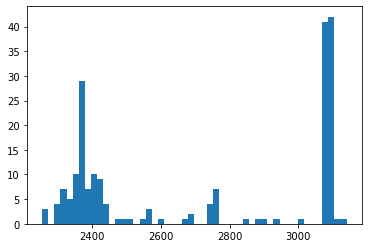

In [34]:
plt.hist(rad_dam_50, bins=50)
plt.show()

In [20]:
def gaus_fit_avg(arr, n_bins = 100, histo_min = np.min(arr), histo_max = np.max(arr), print_sigma=True):
    
    mean = np.mean(arr)
    histo = TH1F("",'',n_bins,histo_min,histo_max)
    for i in arr:
        histo.Fill(i)
    canvas = TCanvas()
    f = TF1("f","gaus")
    f.FixParameter(1,mean)
    histo.Fit(f, "S")
    #histo.GetXaxis().SetTitle("prediction error (mm)");
    yax=histo.GetYaxis()
    gStyle.SetOptStat(1)
    gStyle.SetOptFit(1)
    gStyle.SetStatY(0.9)
    gStyle.SetStatX(0.9)
    gStyle.SetStatW(0.15)
    gStyle.SetStatH(0.15)
    histo.Draw()
    canvas.Draw()
    if print_sigma:
        mean_graph = f.GetParameter(1)
        sigma = f.GetParameter(2)
        err = f.GetParError(2)
        print('Mean: {:.5f} Sigma: {:.5f} ± {:.5f}'.format(mean_graph, sigma, err))
    return histo, canvas, sigma, err

Mean: 5050.80000 Sigma: 38.33822 ± 1.81190


(<ROOT.TH1F object at 0x7fb8f7eb3da0>,
 <ROOT.TCanvas object ("c1_n5") at 0x7fb8f7ea4b90>,
 38.338218631235186,
 1.8118984462365795)

 FCN=77.41 FROM MIGRAD    STATUS=CONVERGED     142 CALLS         143 TOTAL
                     EDM=7.96125e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.27562e+01   8.00349e+00   3.23489e-02  -3.70644e-05
   2  Mean         5.05080e+03     fixed    
   3  Sigma        3.83382e+01   1.81190e+00   2.00500e-05   3.66999e-02


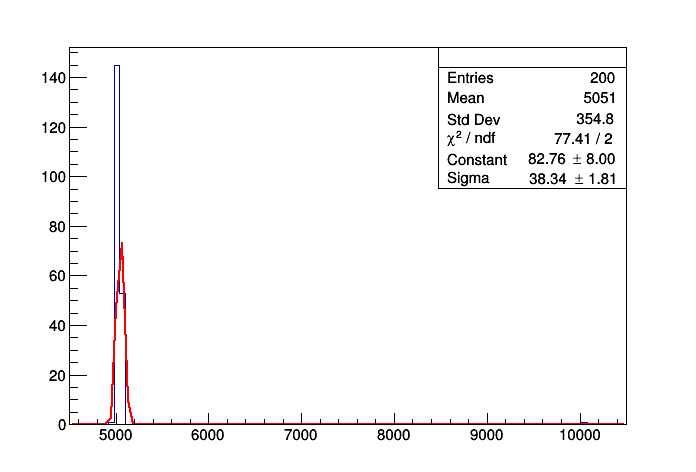

In [21]:
gaus_fit_avg( pixels[:,0])

In [22]:
rad50 = pixels[:,0]

In [24]:
np.mean(rad50)

5050.525

In [25]:
np.std(rad50)

354.7670635431085